In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, norm
 

sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(14,14))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

%matplotlib inline




# Load v2

In [2]:
sc.settings.figdir = "fig3"

In [3]:
adata_lesional=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated11.lesionalonly')
adata_lesional.obs["lvl3_annotation_pred"].value_counts()

lvl3_annotation_pred
UNCERTAIN_CELLTYPE           69589
F1: Secretory                28818
F3: CCL19                    26089
F4: DPEP1                    22263
F2: Bridge                   17588
F2: Universal (reticular)    13591
F5: SFRP4+                    4026
F5: RAMP1+                    3872
F4: TNN+COCH+                 2543
F_fascia                      1454
F4: DP_HHIP+                   923
Name: count, dtype: int64

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

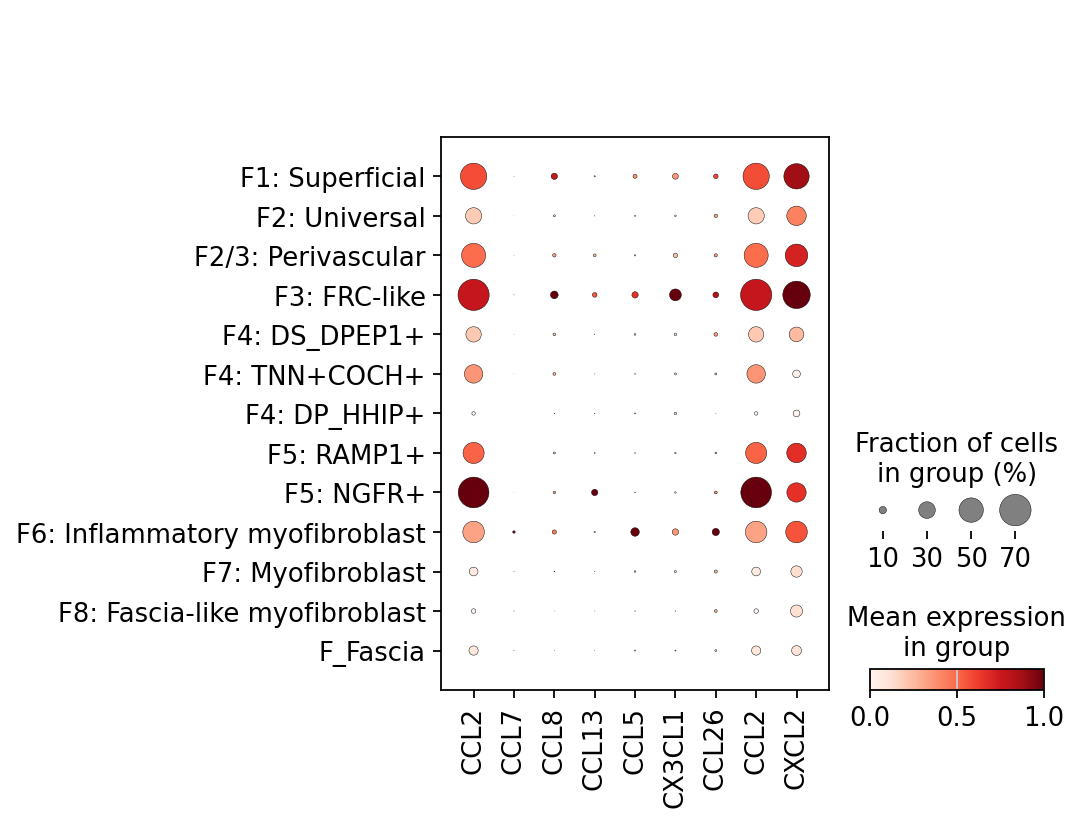

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

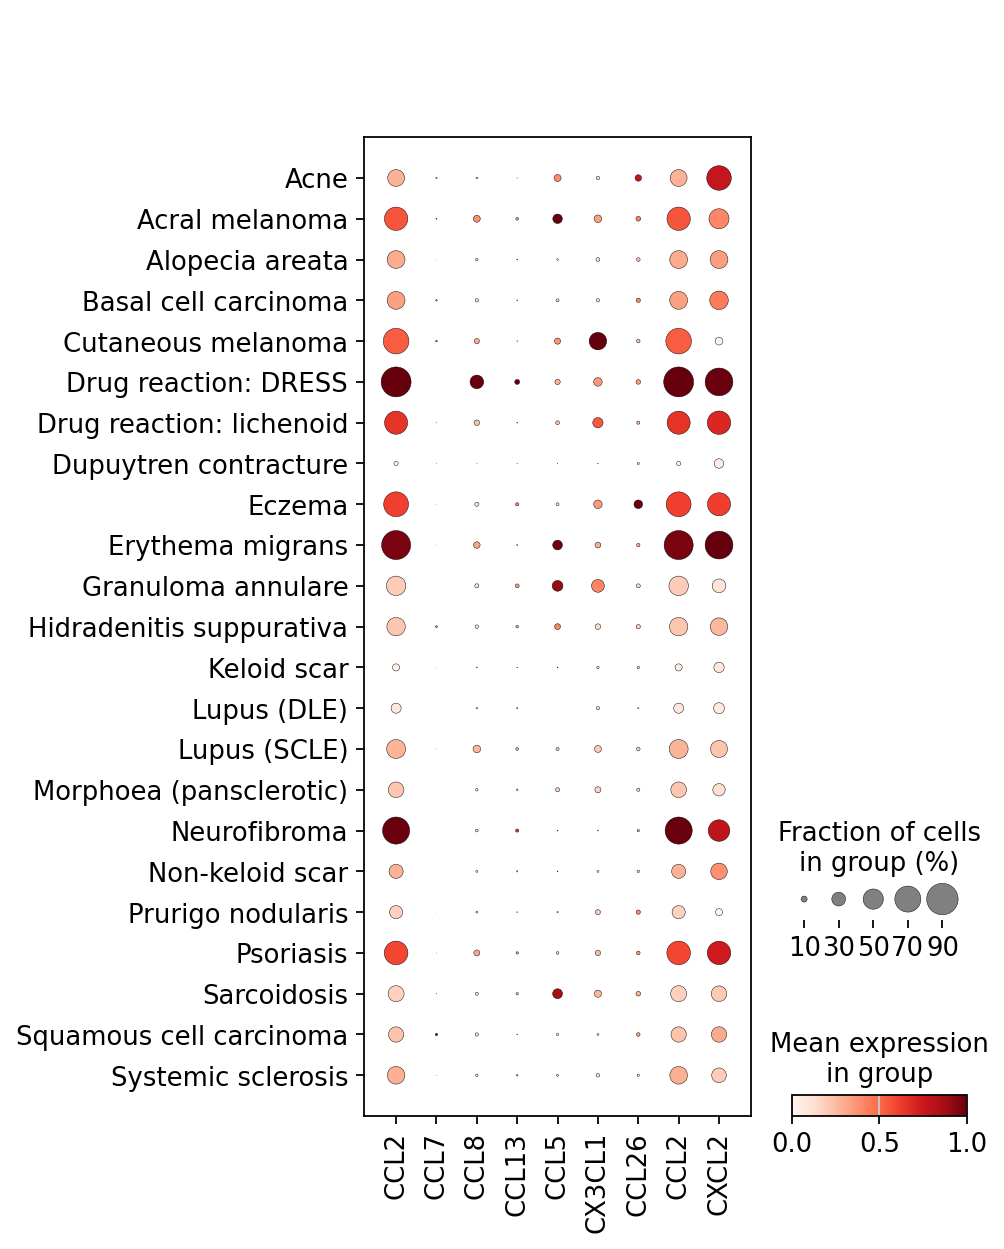

In [6]:
chemokines_that_attract_monocytes = [
    "CCL2",     # MCP-1
    "CCL7",     # MCP-3
    "CCL8",     # MCP-2
    "CCL13",    # MCP-4
    "CCL5",     # RANTES
    "CX3CL1"  ,  # Fractalkine
    
            "CCL26", "CCL2", "CXCL2",

]
sc.pl.dotplot(
    adata_lesional,
    chemokines_that_attract_monocytes,
    groupby=f'test13',
    #vmax=1.1,
   # colorbar_title='Mean expression\n(log1p norm)', 
   standard_scale="var",
    vmax=1,
    dendrogram=False,
   # swap_axes=True,
       # categories_order=ORDER,
       # save="fig_3g_by_disease_dotplot.pdf"

) 

sc.pl.dotplot(
    adata_lesional,
    chemokines_that_attract_monocytes,
    groupby=f'Patient_status2',
    #vmax=1.1,
   # colorbar_title='Mean expression\n(log1p norm)', 
   standard_scale="var",
    vmax=1,
    dendrogram=False,
    #swap_axes=True,
       # categories_order=ORDER,
       # save="fig_3g_by_disease_dotplot.pdf"

) 

In [4]:
# RENAME = {"Dupuytren's": "Dupuytren contracture"}
# adata_lesional.obs["Patient_status2"] = adata_lesional.obs["Patient_status2"].map(RENAME).fillna(adata_lesional.obs["Patient_status2"])

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


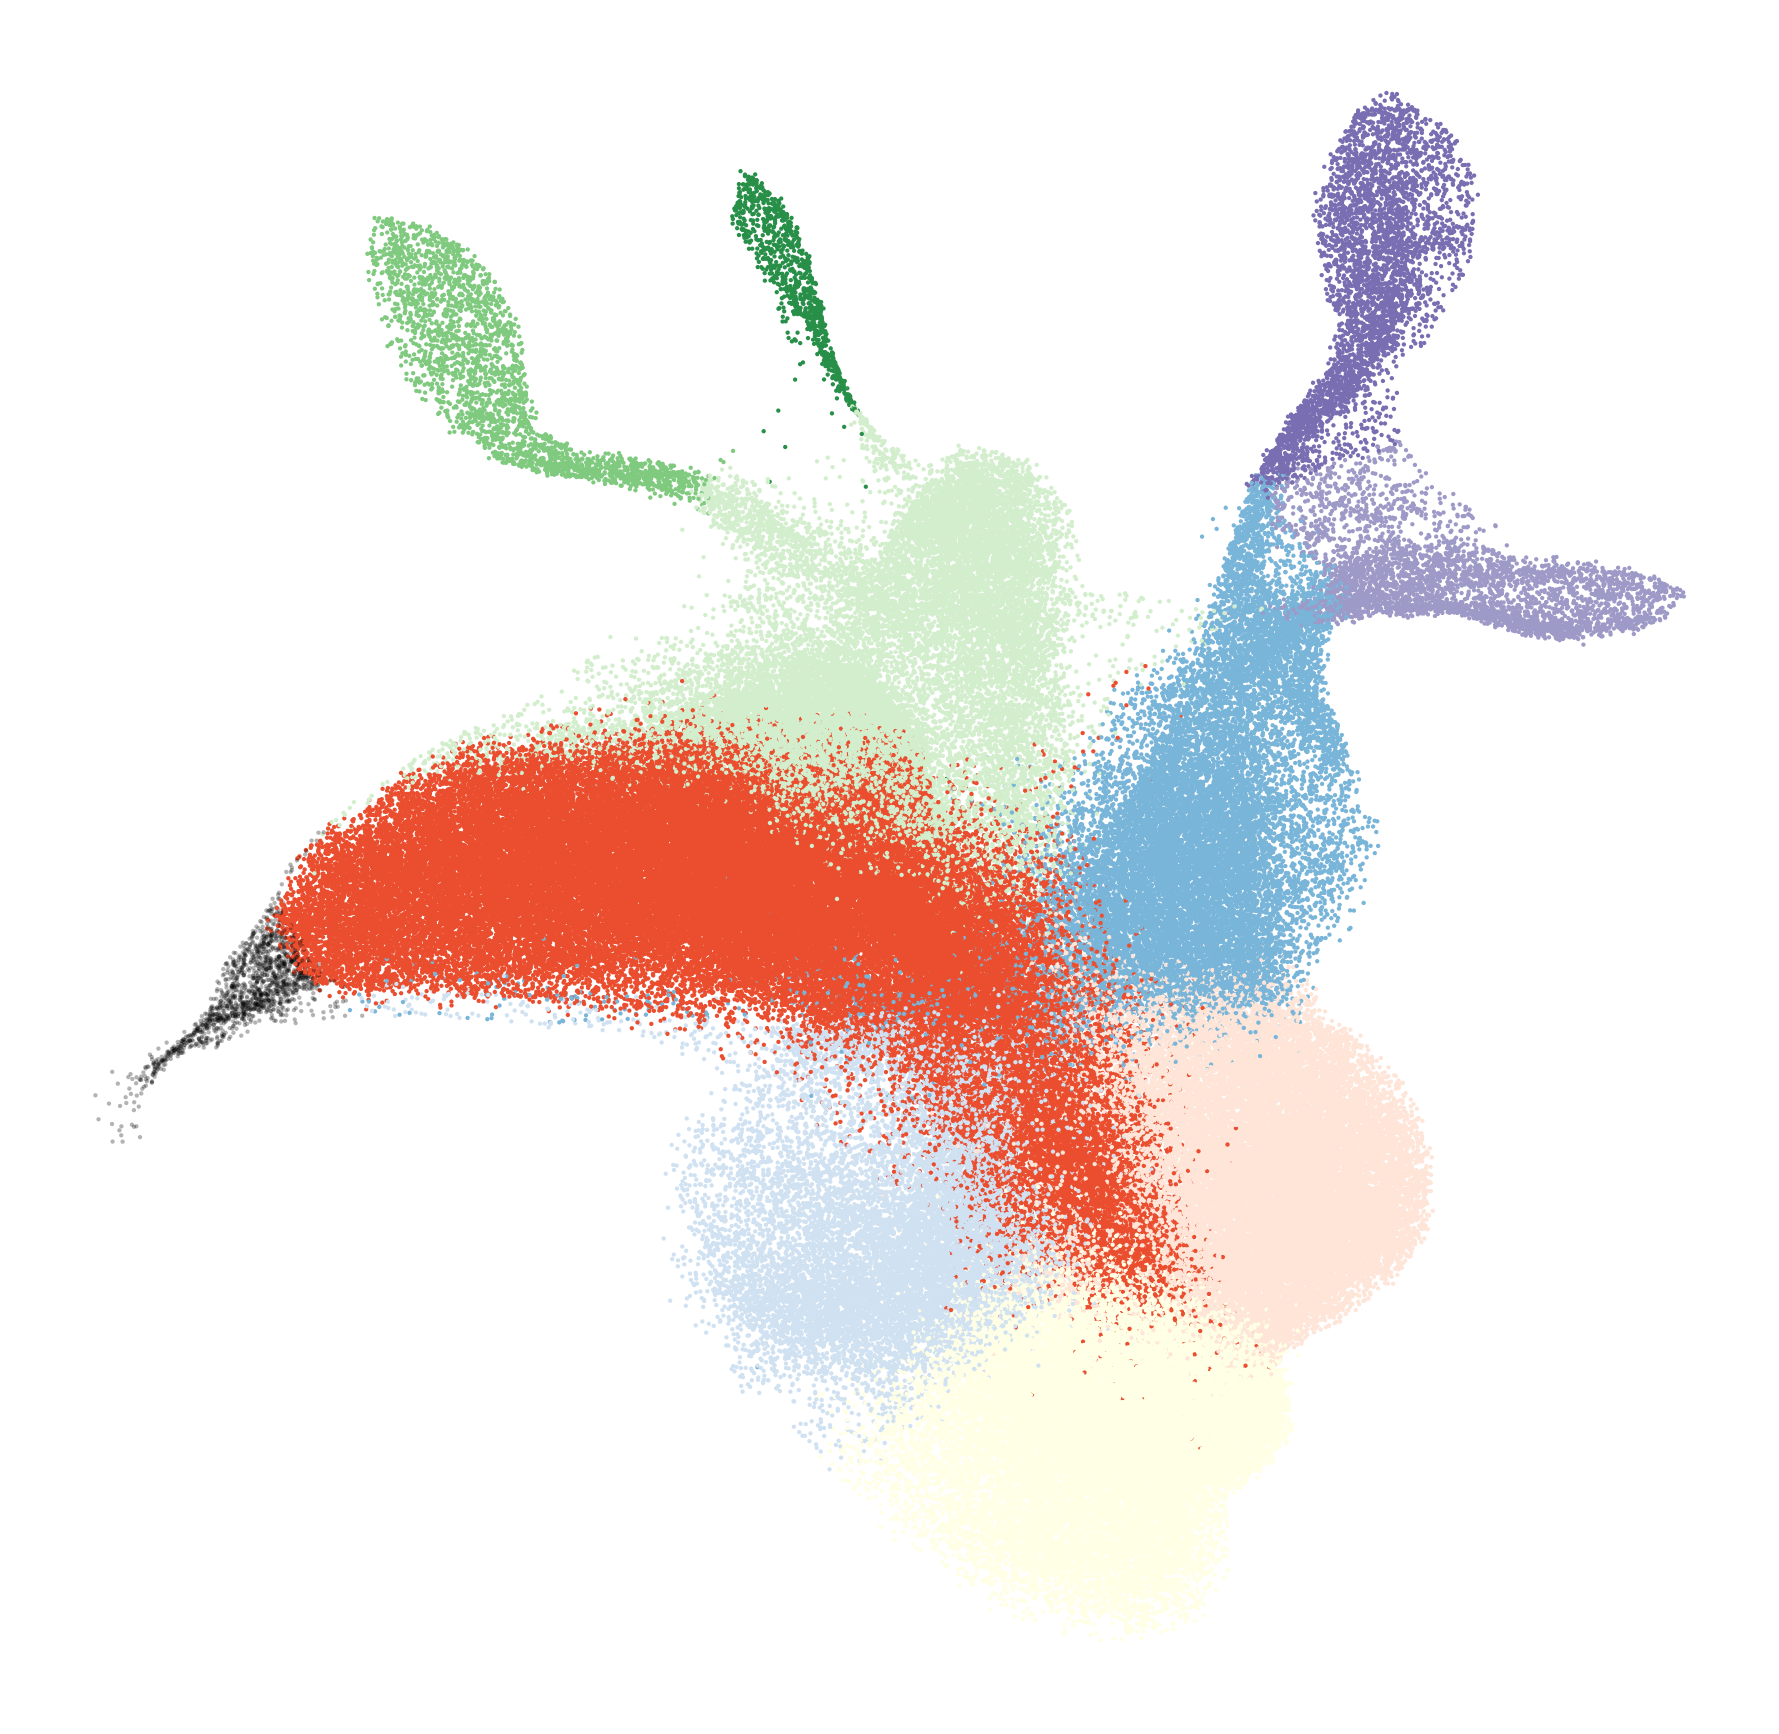

In [5]:
custom_colors = {'F1: Secretory': np.array([1.        , 1.        , 0.89803922, 1.        ]),
 'F1: Regenerative': np.array([0.99607843, 0.80915033, 0.39607843, 1.        ]),
'F2: Universal (reticular)': np.array([0.81411765, 0.88392157, 0.94980392, 1.        ]),
 'F2: Bridge': np.array([0.47294118, 0.71163399, 0.85071895, 1.        ]),
 'F3: CCL19': np.array([0.99692426, 0.89619377, 0.84890427, 1.        ]),
 'F4: DPEP1': np.array([0.82745098, 0.93254902, 0.80313725, 1.        ]),
 'F4: TNN+COCH+': np.array([0.50196078, 0.79058824, 0.50143791, 1.        ]),
 'F4: DP_HHIP+': np.array([0.15294118, 0.56183007, 0.28313725, 1.        ]),
 'F5: RAMP1+':np.array([0.6177624 , 0.60213764, 0.78345252, 1.        ]),
 'F5: SFRP4+': np.array([0.47320261, 0.43267974, 0.69934641, 1.        ]),
 #'F6: Myofibroblast inflammatory': np.array([0., 1., 1., 1.]),
# 'F6: Myofibroblast': np.array([0.33333333, 0.66666667, 1.        , 1.        ]),
# 'F7: Myofibroblast fascia-like': np.array([0.95686275, 0.55686275, 0.74509804, 1.0]),
 'F_fascia': np.array([0, 0, 0, 0.3]),
          "UNCERTAIN_CELLTYPE"   : np.array([234 / 255, 78 / 255, 47 / 255, 1.0])
                               }


try:
    adata_lesional.uns["lvl3_annotation_pred_colors"] = [custom_colors[cat] for cat in adata_lesional.obs["lvl3_annotation_pred"].cat.categories]
except KeyError as e:
    print(f"Error: Missing color for category {e}")
                                                                            
sc.pl.umap(
    adata_lesional,
    color='lvl3_annotation_pred',
    show=True,
    frameon=False,
    legend_loc=None, #"on data",
    legend_fontsize=1,
    s=15,
    title='',
    legend_fontoutline=2,
    save='_fig3b_uncertainty_umap.pdf'
)

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


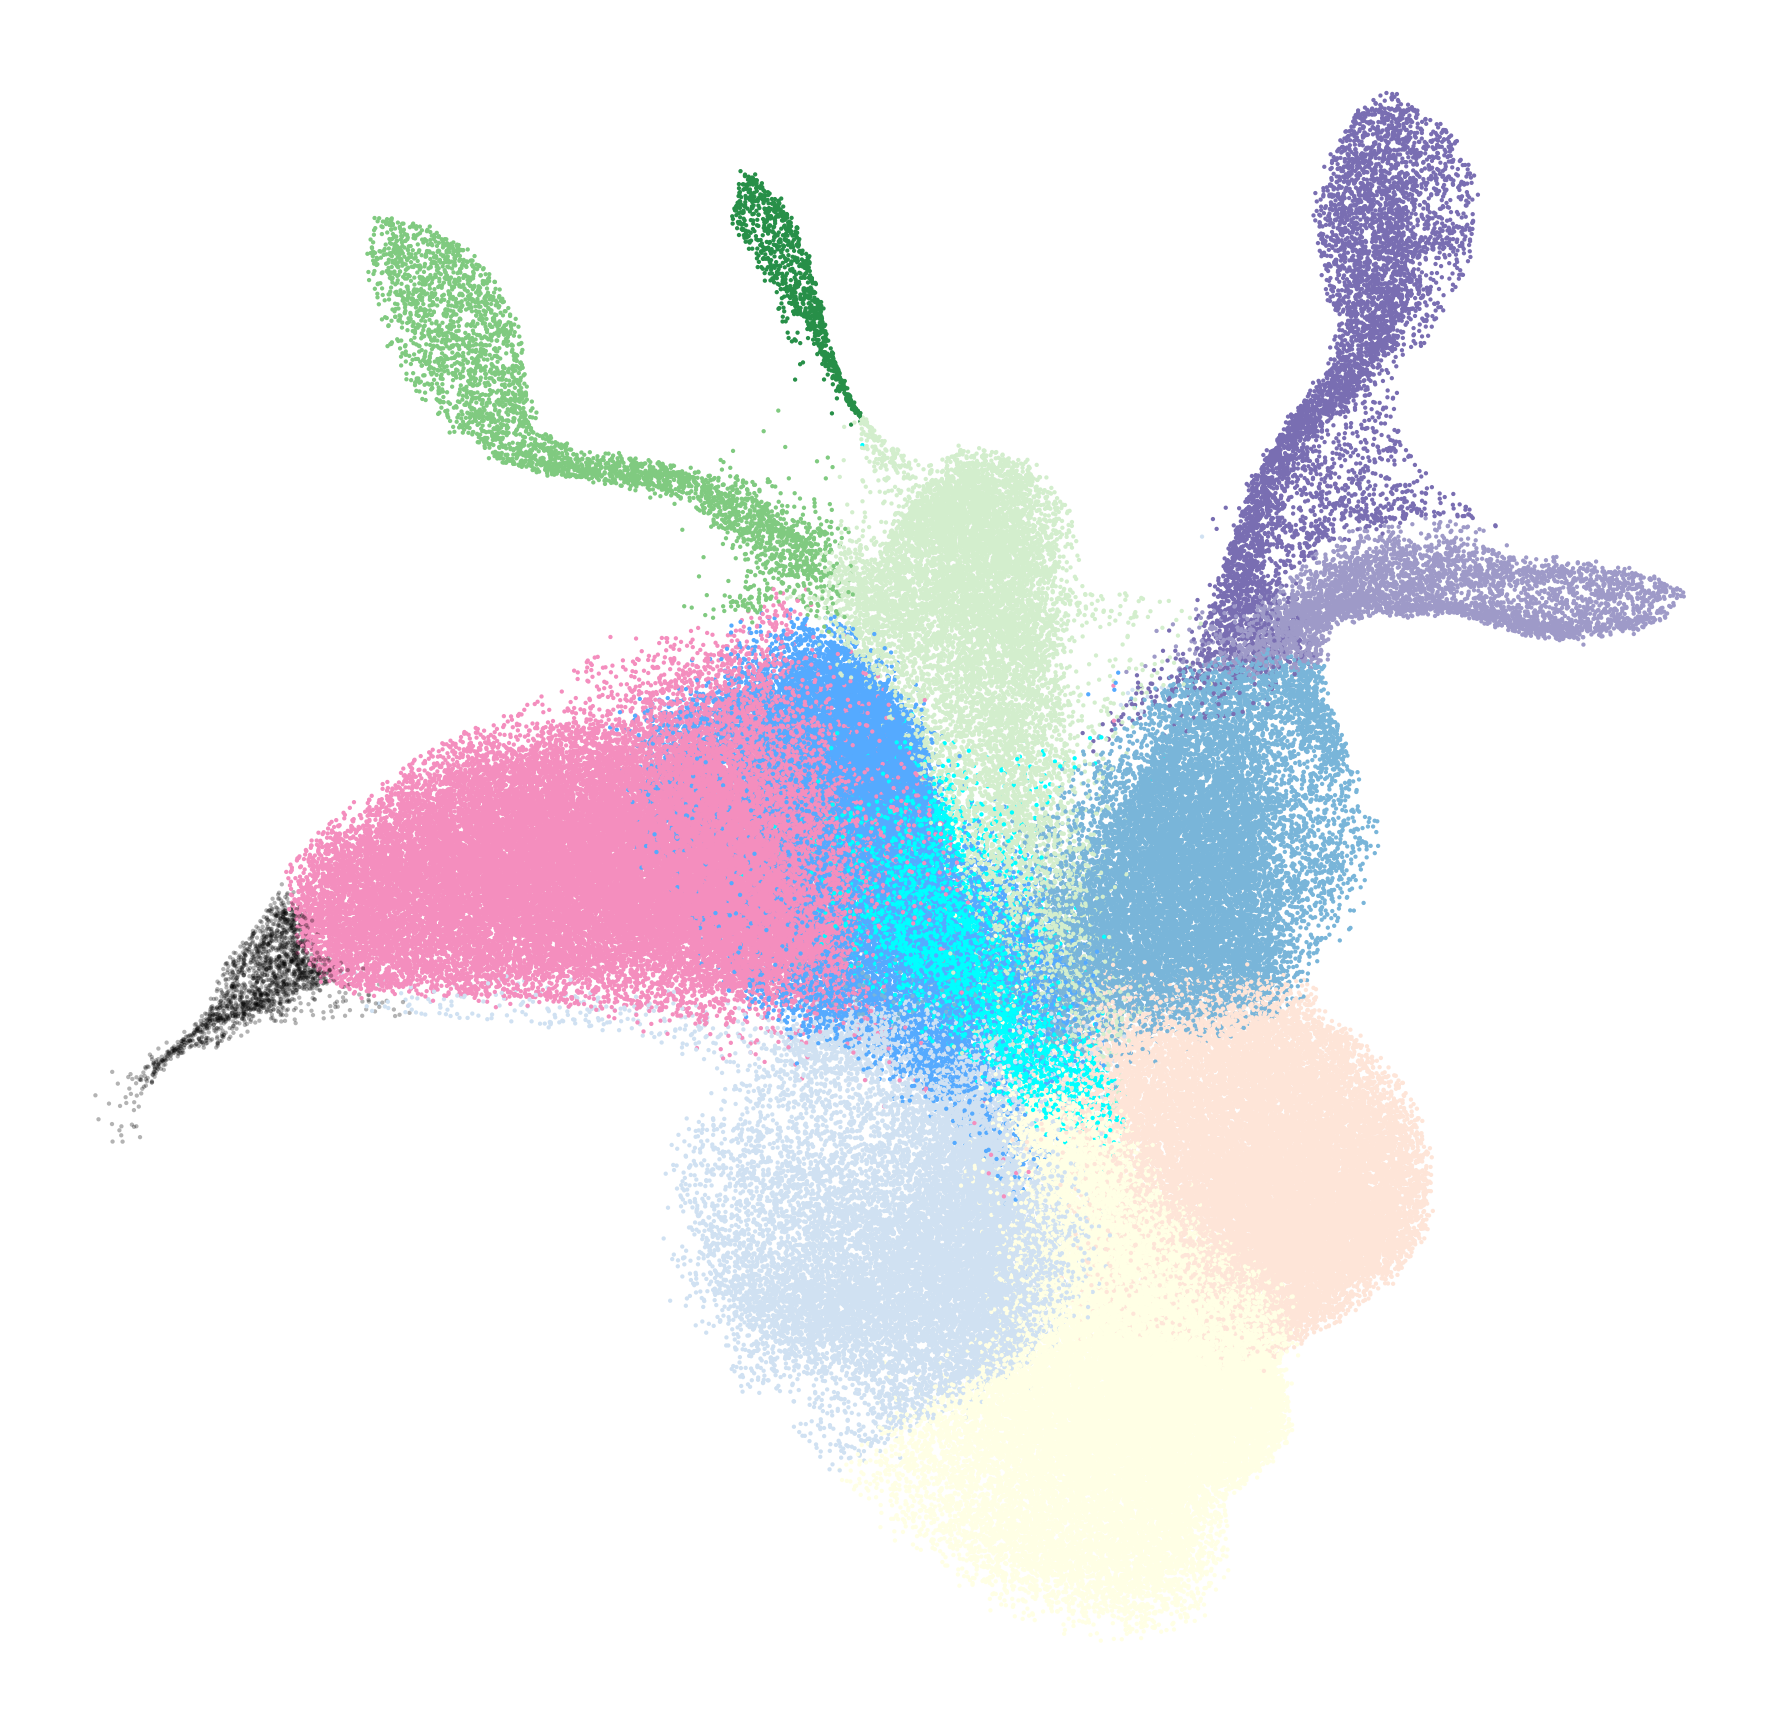

In [6]:
sc.pl.umap(
    adata_lesional,
    color='test13',
    show=True,
    frameon=False,
    legend_loc=None, #"on data",
    legend_fontsize=1,
    s=15,
    title='',
    legend_fontoutline=2,
    save='_fig3b_uncertainty_umap_relabelled.pdf'
)

# Disease plots

In [7]:
ORDER = [ 'Erythema migrans',
          'Granuloma annulare',
          'Sarcoidosis',
         'Drug reaction: lichenoid',
 'Drug reaction: DRESS',
          'Acral melanoma',
                   'Morphoea (pansclerotic)', 'Systemic sclerosis',


 'Basal cell carcinoma',

 'Acne',
 'Non-keloid scar',




 'Neurofibroma',

 'Squamous cell carcinoma', "Dupuytren contracture",
 'Lupus (DLE)',
 'Lupus (SCLE)',
 'Alopecia areata',
 'Prurigo nodularis',
 'Hidradenitis suppurativa',
          'Keloid scar',
 'Cutaneous melanoma',
 'Psoriasis',
 'Eczema']

In [8]:
adata_lesional_f3=adata_lesional[adata_lesional.obs["test13"].str.startswith("F3")]


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

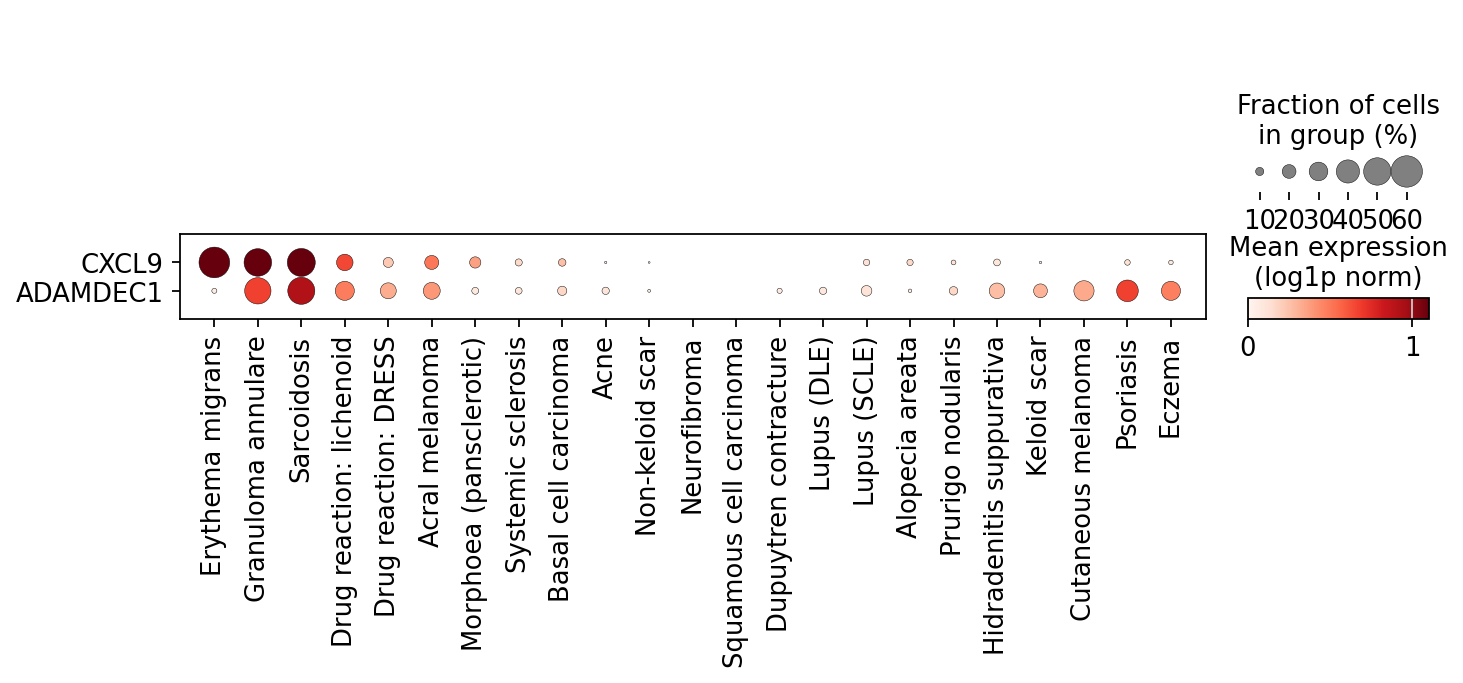

In [9]:
FB_ALL = ["CXCL9",#"CXCL10",
          "ADAMDEC1"]
       
sc.pl.dotplot(
    adata_lesional_f3,
    FB_ALL,
    groupby=f'Patient_status2',
    #vmax=1.1,
    colorbar_title='Mean expression\n(log1p norm)', 
   #standard_scale="var",
    vmax=1.1,
    dendrogram=False,
    swap_axes=True,
        categories_order=ORDER,
        save="fig_3g_by_disease_dotplot.pdf"

) 

# sc.pl.matrixplot(
#     adata_lesional_f3,
#     FB_ALL,
#     groupby=f'Patient_status2',
#     vmax=.5,
#     colorbar_title='Mean expression\n(log1p norm)', 
#    #standard_scale="var",
#     dendrogram=False,
#     swap_axes=True,
#     cmap="Reds",
#     categories_order=ORDER,
#     save="f3_by_disease_heat.pdf"
# ) 

In [10]:
# COLEC_GENES = ["COLEC11", "C7", "SULT1E1", "CFH", "CALCRL", "KLF9", "OMD", "CXCL8", "BMP5", "ANGPT1", "FOXC1","FOXC2", "AVPR1A", 
#  "ENPEP",  "CTSV", "COLEC10", "IL1R1", "ENG", "CLEC2B", "COL25A1", "KAZN", "FOXF2", "EYA1", "CEMIP", "CYP4X1", "KRT18"]

# sc.pl.dotplot(
#     adata_lesional,
#     COLEC_GENES,
#     groupby="test13",
#     standard_scale="var",
#     dendrogram=False,
# )

In [11]:
# SCHWANN = ['SOX9','COL9A1', 'ACAN',  'COL2A1', 'MPZ',
# 'SOX10' , 'SOX9', 'PRRX1','PRRX2', 'PDGFRA', 'TWIST2']

# sc.pl.dotplot(
#     adata_lesional,
#     SCHWANN,
#     groupby="test13",
#     standard_scale="var",
#     dendrogram=False,
# )

In [12]:
# FB_ALL = {"F6": ["COL4A1", "COL4A1", "RAMP1", "APCDD1", "PRDM1", "GGT5", "HOXA10", "MMP1", "CXCL1", "WNT4", "TDO2", "EDNRB", "PTPRE", "CHI3L1", "IL15RA"],
# "F7": ["NRG1", "LGR4", "MFAP5", "COL11A1", "CILP2", "PDZRN4", "ADAMTS6", "KANK4", "EYA2", "OOEP", "ITGA11", "COL10A1", "FGFR2",],
#           "F8": ["ACAN", "TUBB2B", "CADM1", "THBS4", "MET", "FAM49A", "DOK5", "EVI2A", "CDH13", "BMPR1B"]
#          }
        
# sc.pl.dotplot(
#     adata_lesional,
#     FB_ALL,
#     groupby=f'test13',
#     #vmax=1.1,
#     colorbar_title='Mean expression\n(variance scaled)', 
#    standard_scale="var",
#     dendrogram=False,
# ) 

In [13]:
# F6 = ["COL4A1", "COL4A1", "RAMP1", "APCDD1", "PRDM1", "GGT5", "HOXA10", "MMP1", "CXCL1", "WNT4", "TDO2", "EDNRB", "PTPRE", "CHI3L1", "IL15RA"]
# sc.pl.dotplot(
#     adata_lesional,
#     F6,
#     groupby=f'test13',
#     #vmax=1.1,
#     colorbar_title='Mean expression\n(variance scaled)', 
#    standard_scale="var",
#     dendrogram=False,
# ) 

# gene dicts

In [14]:
import pickle

pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'

with open(pickle_file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)





In [15]:
LESIONAL_GENES_VSHORT5 = {   
    "F3": ['CCL19',
 'CD74',
 'CH25H',
#  'TNFSF13B',
# 'HLA-DRA',
                                      "ADAMDEC1", "CXCL9"
          ], 
                          "F1": [#'APCDD1',
 'COL18A1',
 'COL23A1',
 'COL13A1',
 'NKD2',
 #'RSPO1',
 #'WIF1', 'CYP26B1', 
                              'CRABP1', # "IGFBP2", 
                                            'TNFRSF21', 'CXCL1', #'IL32',  'IL1R1',  'ITGA1', #
                                         #  'PDE4B',#"CCL8", #'FZD10', 
                                         #  'GUCY1A1',
                                          # "GGT5"
                                          ],
                         # "F1 Regenerative downregulated": ["WIF1"],
                        "F1+F6": ["WNT5A", "COL7A1"],
    "F6":    [ "CXCL8", 'CXCL5', "CXCL6",  "CXCL13",    'IL11', "IL24","MMP1", "MMP3",
                                      "IL7R",
                                     "INHBA",     "CSF3",  "TDO2", 
                                                      #  "IL7R",  #"CDH6", 
                            #"TENM4","H19", #"TSPAN13","LAMP5" 
                          #"TOX", "NEFH", "FABP5", "LRRC17", "ADAM12", "PLPP4", "FAT3",  #   "SLC24A2", "COL10A1",#  "LAMP5",  
                                     # "EGFL6", #"ALPK2",
                                              #"ITGA10", "ADAMTS14", 
                                           #'STARD4-AS1', #'COL9A3', # "ADAM19", "SIX1", "TNFSF4", 
                                              # "MIR503HG",
      # "POPDC3", #"MSX2", "GK", "CPM", 
                                      "WWC1", #"SLAMF8", 
      # "BMP8A", 
       "CHI3L1",#"STAT4",#"IFI30",
                                          "CCL5", # "CCL3",    
                                          "CCL11",   #"HCK", #"FOXQ1", "FOXF2", 
       "FAM167A", 
                                          "HIF1A"
#        "CCL19", "CD74", "RBP5",# "HLA-DRA",
                                    ],
                          #
#                           ["PTGDR", "CSF3",   "TDO2", "POPDC3", "MSX2",# "GK", "CPM", "WWC1", "SLAMF8", 
#        "BMP8A", "CHI3L1","STAT4",  #"HCK", #"FOXQ1", "FOXF2", 
       
#        "CCL19", "CD74", "RBP5", "HLA-DRA", "IFI30","CCL5", ],
                          
#                           "MYOFB2": ["PTGDR", "CSF3",   "TDO2", "POPDC3", "MSX2",# "GK", "CPM", "WWC1", "SLAMF8", 
#        "BMP8A", "CHI3L1","STAT4",  #"HCK", #"FOXQ1", "FOXF2", 
       
#        "CCL19", "CD74", "RBP5", "HLA-DRA", "IFI30","CCL5", ],

         "F6+F7": [  "WNT2", # "WNT4" 
                     "COL10A1", "LAMP5"], #"ZNF469", # "ITGA4",# "TDO2",             
                  
                                 #     "F_Fascia1": ["MYOC", "CCDC3", "COLGALT2", "TMOD1", "GLIPR1"],
                   # "F_Fascia2": ["CDH13", "CRTAC1", "ITGA10"],
                  
                            #"PP": ["LRP1B", "CAPS", "F5", "FGFBP2", "TBX5", "HOXA13", "SOSTDC1"],
               "F7": [ 'NRG1', "OGN"],
                          "F6-F8": [ "ACTA2", "TAGLN","ASPN", 'COMP', "COL11A1",
    
                                          
                                          # "MYH9" 
                         "KIF26B",  "ZNF469", # "GUCY1A2",  
                            "RUNX2",#  "ADAMTS14",
                                      "SULF1",
                                  "ADAM12", "ADAM19",  "COL8A1", "LRRC15", "CREB3L1","CTHRC1", "CCN4", "FABP5",     "CDH2"],
                              
                          
                "F7+F8": ["C1QTNF3", "CADM1",      "LRRC17",   # "SCX" ,
                                   "PIEZO2" ,  "SFRP4",  "KCNMA1", ],#"FAT3",
                       
                          "F8": ["ACAN", # "TUBB2B", 
                                # 'CD70' ,
                            #     "MEST", #"DRAXIN"
                              # "DPP4",
                         "SCX",    "THBS4", "ITGA10", #"EVI2A" ,
                             "FGF18",   'PRG4',  'CRTAC1', 
                                    # "IL13RA1","IL13RA2",
                          
                                     # "PRG4",
                  #        "CCN3", #"CCN5",#"PROCR",# "IL4R",
                                       # "ALDH1A1",# "CRTAC1", 
                           #"GALNT15",
                                      # "MYOC", 
        # "CILP2", 
   # "CHAD", "PDLIM3", 
                         ]
    
#     [ "ITGA10", "CCN3",  #"DPP4",
#                              "THBS4",  #"GALNT15",
#                                       # "MYOC",# "SCX", 
#                                    #   "NCAM1","CHAD", #"IL13RA1","IL13RA2",
#                             # "CILP2", #"PROCR",# "CHAD",
#                                       "PRG4", "CRTAC1", #"FGF18", 
#                                        "EVI2A" #"CCN5"# "FGF18", "IL4R"
#                                       ], 
                 }
 



In [16]:
import pickle

# Define your file path
file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'

# Save the dictionary
with open(file_path, 'wb') as file:
    pickle.dump(LESIONAL_GENES_VSHORT5, file)

print(f"Dictionary saved to {file_path}")





Dictionary saved to /nfs/team298/ls34/fb_dict_lesional.pkl


# include F3 in plot

In [17]:

adata_lesional3=adata_lesional[(adata_lesional.obs["test13"].str.startswith("F3"))|
                            (adata_lesional.obs["test13"].str.startswith("F1"))|
                            (adata_lesional.obs["test13"].str.startswith("F6"))|
                              (adata_lesional.obs["test13"].str.startswith("F7"))|
                                  (adata_lesional.obs["test13"].str.startswith("F8"))|
                              (adata_lesional.obs["test13"].str.startswith("F_"))
                             ]




desired_order = ['F3: FRC-like',
    'F1: Superficial',
    'F6: Inflammatory myofibroblast',
    'F7: Myofibroblast',
    'F8: Fascia-like myofibroblast',
    'F_Fascia'
]

adata_lesional3.obs['test13'] = pd.Categorical(
    adata_lesional3.obs['test13'],
    categories=desired_order,
    ordered=True
)



/tmp/ipykernel_14058/3479157417.py:20: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_lesional3.obs['test13'] = pd.Categorical(


In [18]:
adata_lesional3.obs["test13"].value_counts()

test13
F8: Fascia-like myofibroblast     38290
F1: Superficial                   36949
F7: Myofibroblast                 25474
F3: FRC-like                      23147
F6: Inflammatory myofibroblast     6157
F_Fascia                           1764
Name: count, dtype: int64

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

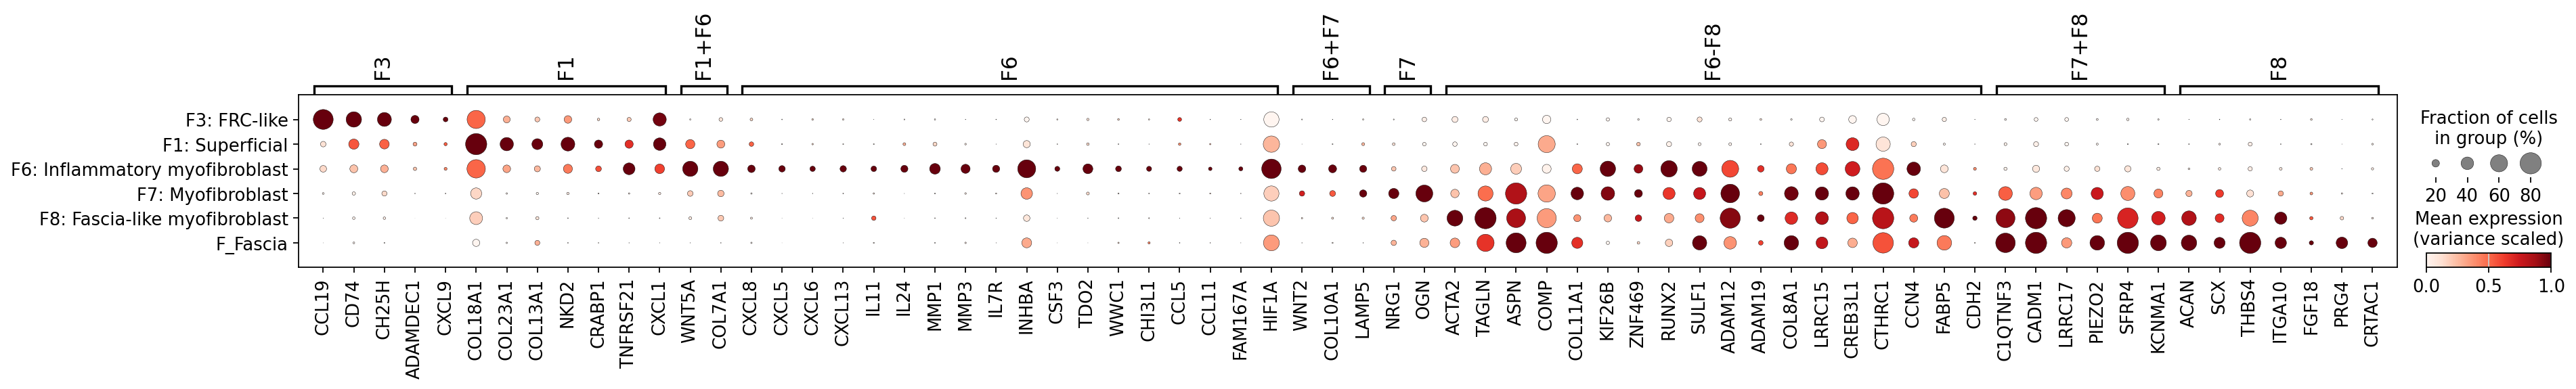

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

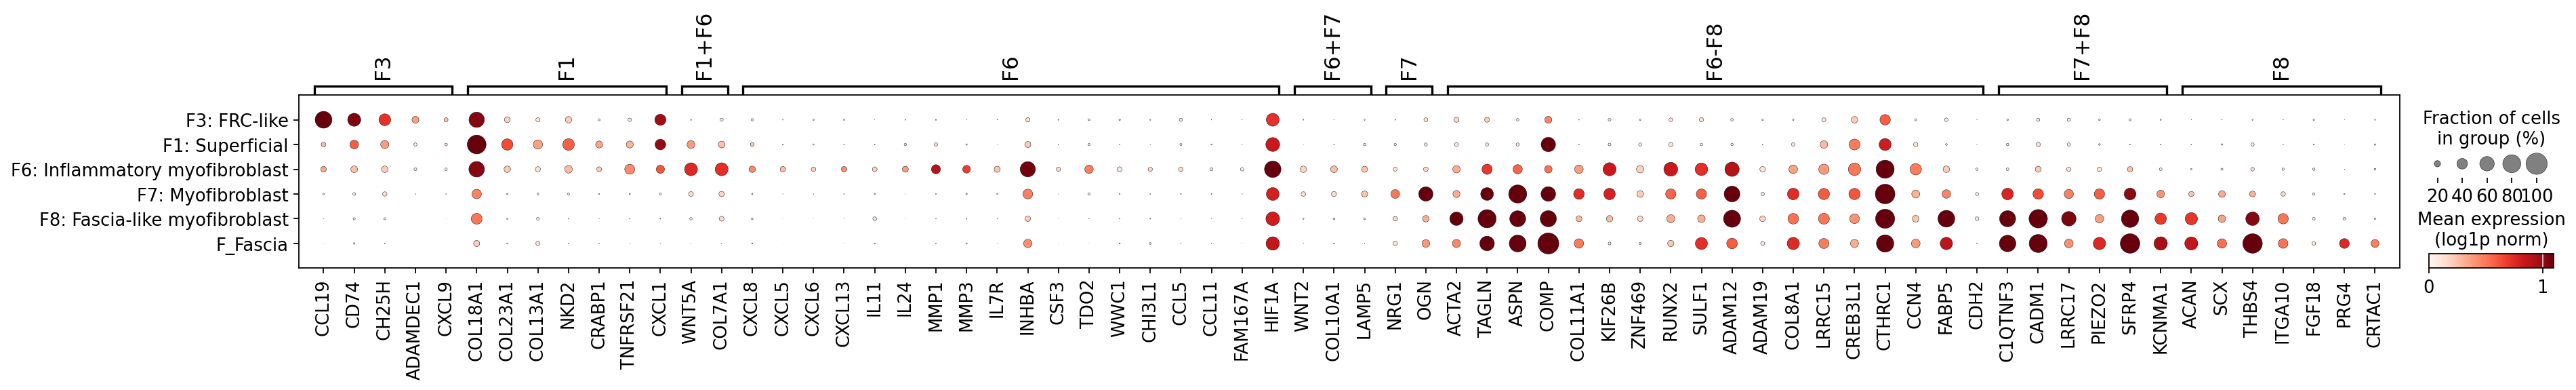

In [19]:
sc.pl.dotplot(
    adata_lesional3,
    LESIONAL_GENES_VSHORT5,
    groupby="test13",
    vmax=1.0, standard_scale="var",
    colorbar_title='Mean expression\n(variance scaled)', 
    dendrogram=False, dot_max=0.8,
    save="fig3c_overalldotplot.pdf"
    
) 


sc.pl.dotplot(
    adata_lesional3,
    LESIONAL_GENES_VSHORT5,
    groupby="test13", 
    vmax=1.1,colorbar_title='Mean expression\n(log1p norm)', 
    dendrogram=False,
) 
 

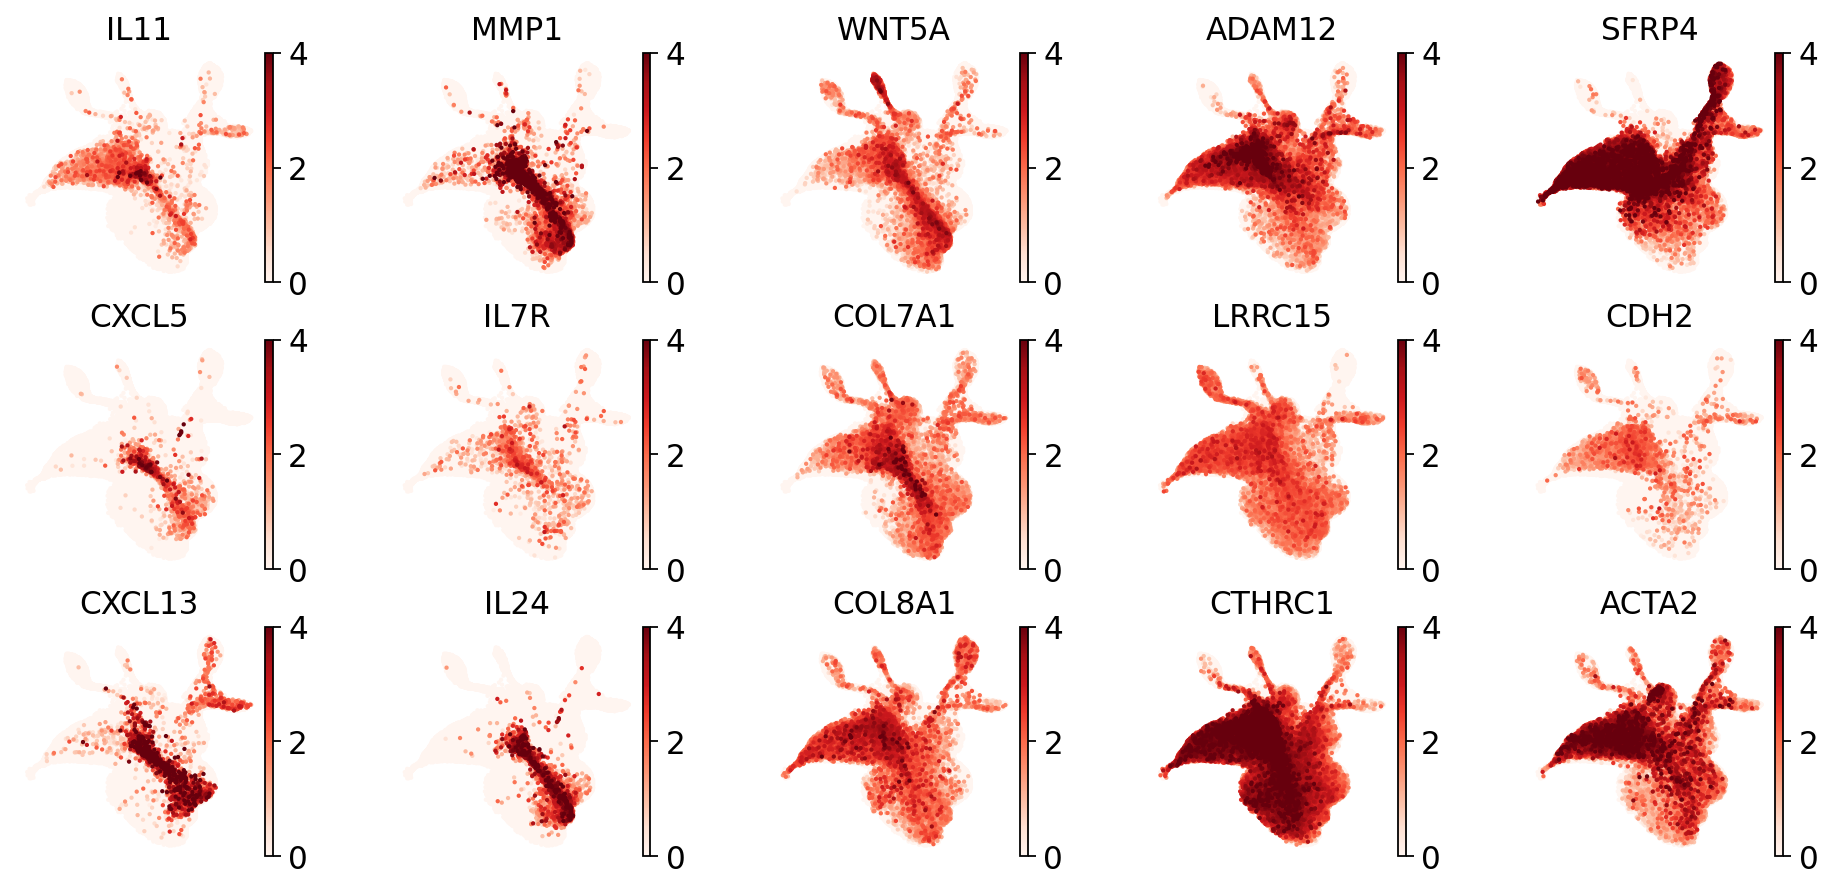

In [20]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(2,2))

sc.pl.umap(
    adata_lesional,
    color=["IL11", "MMP1",  "WNT5A",   "ADAM12",   "SFRP4", 
           "CXCL5", "IL7R", "COL7A1",    "LRRC15", "CDH2",
           "CXCL13", "IL24","COL8A1",  "CTHRC1",   "ACTA2", 
   ],
    s=15,
    legend_loc=None,
    vmax=4,
    ncols=5,
    cmap="Reds",
    save="fig3_featuremaps.pdf" 
)

sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(14,14))


# lesional f1 vs f3

In [21]:
import scanpy as sc
PATH = '/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated11'
adata=sc.read_h5ad(PATH)

In [22]:
import pickle

pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'

with open(pickle_file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)


file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'
with open(pickle_file_path, 'rb') as file:
    LESIONAL_GENES_VSHORT5 = pickle.load(file)



In [23]:
adata_f1 = adata[adata.obs['test13'].str.startswith("F1")]


In [24]:
import anndata as ad
adata_healthy = adata_f1[adata_f1.obs['Patient_status']=="Healthy"]
adata_lesional = adata_f1[adata_f1.obs['Patient_status2']!="Nonlesional"]
adata_f1=ad.concat([adata_healthy, adata_lesional], label="Site_status_binary", keys=["Healthy","Lesional"])

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

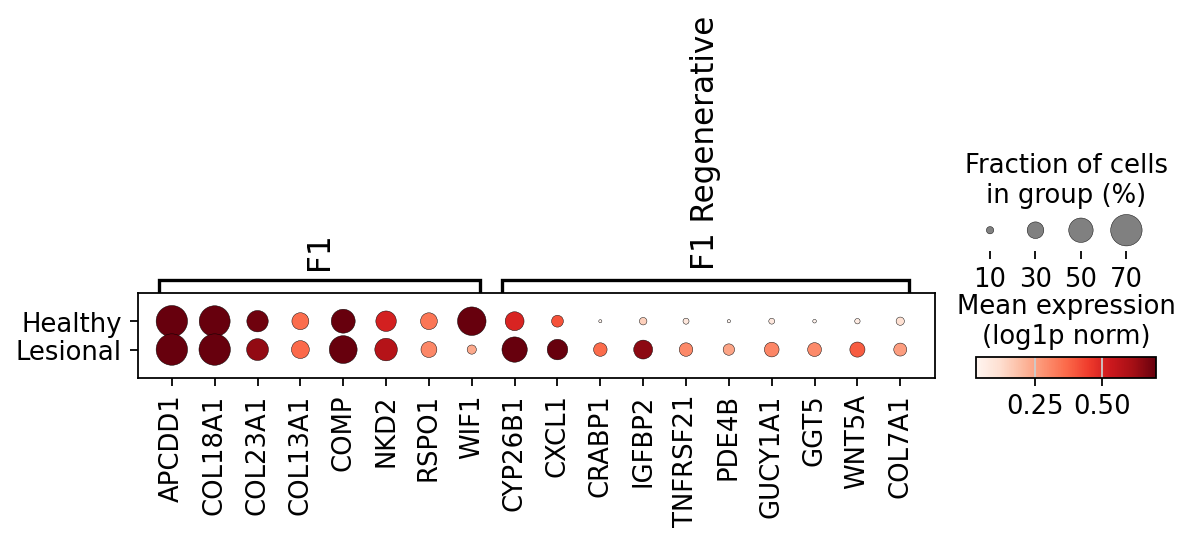

In [25]:
F1_GENES = {    
                          "F1": ['APCDD1',
 'COL18A1',
 'COL23A1',
 'COL13A1',
 'COMP',
 'NKD2',
 'RSPO1',
 'WIF1',],
                          
                          "F1 Regenerative": ['CYP26B1', 'CXCL1',  'CRABP1',  "IGFBP2", 
                                            'TNFRSF21',   
                                          'PDE4B', 
                                           'GUCY1A1',
                                           "GGT5" ,"WNT5A", "COL7A1", #"CCL8",
                                             ],
                         }
                          

sc.pl.dotplot(
    adata_f1,
    F1_GENES,
    groupby="Site_status_binary", 
    vmax=.7,colorbar_title='Mean expression\n(log1p norm)', 
    dendrogram=False,
    dot_max=.7,
    save="fig3e_f1activation.pdf"

) 




In [26]:
adata_f3 = adata[adata.obs['test13'].str.startswith("F3")]
adata_healthy = adata_f3[adata_f3.obs['Patient_status']=="Healthy"]
adata_lesional = adata_f3[adata_f3.obs['Patient_status2']!="Nonlesional"]
adata_f3=ad.concat([adata_healthy, adata_lesional], label="Site_status_binary", keys=["Healthy","Lesional"])

In [27]:
# adata_f3.write('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_11_f3only.h5ad')


In [28]:
# stop

NameError: name 'stop' is not defined

In [ ]:
reynolds_short_final["F3"]

In [ ]:
f3_genes = { 'F3': ['CCL19',"CD74" ,  'CH25H',  "TNFSF13B",  'IL33', "IRF8" ,#"COX4I2", 
       # "IL7",
        "IL15",
        "VCAM1", "HLA-DRA", "HLA-DRB1",# "CCL11","CCL7", "CCL2",
        
        #"ICAM1", 
        #'CX3CL1', 'ACHE', 'CCL8', 
 
           ], "Activated": ["ADAMDEC1", "CXCL9", #"CXCL10"
                           ]
           }

sc.pl.dotplot(
    adata_f3,
    f3_genes,
    groupby="Site_status_binary", 
    vmax=.7,colorbar_title='Mean expression\n(log1p norm)', 
    dendrogram=False,
    dot_max=.7,
    save="fig3e_f3activation.pdf"
) 




# F4 vs F6/F7

In [ ]:
adata_i = adata[adata.obs["test13"].str.startswith(("F4", "F6", "F7"))]


In [ ]:
adata_i.obs["test"] = adata_i.obs["test13"].astype(str)  + "_" + adata_i.obs["Site_status_binary"].astype(str) 
adata_i.obs["test"].value_counts()

In [ ]:
KEEP = ['F7: Myofibroblast_Nonlesional', 'F8: Fascia-like myofibroblast_Nonlesional', 'F6: Inflammatory myofibroblast_Nonlesional'
]
adata_i = adata_i[~adata_i.obs["test"].isin(KEEP)]

In [ ]:
F4_F6_GENES = {'F4': ['ASPN'],
 'F4: DS_DPEP1+': ['COL11A1', 'MEF2C', 'DPEP1', 'MYL4'],
 'F4: TNN+COCH+': ['TNN',
  'COCH',
  'CRABP1',
  'COL24A1',
  'RSPO4',
  'SLITRK6',
  'NRG3',
  'MKX',
  'TNMD'],
 'F4: DP_HHIP+': ['CORIN',
  'BMP7',
  'WNT5A',
  'LEF1',
  'HHIP',
  'RSPO3',
  'INHBA',
  'PTCH1'],
                'F1+F6:My_Inf': ['WNT5A', 'COL7A1'],
 'F6: Myofibroblast inflammatory': ['CXCL8',
  'CXCL5',
  'CXCL6',
  'CXCL13',
  'IL11',
  'IL24',
  'MMP1',
  'MMP3',
  'IL7R',
  'INHBA',
  'CSF3',
  'TDO2',
  'WWC1',
  'CHI3L1',
  'STAT4',
  'CCL5',
  'CCL3',
  'CCL11',
  'FAM167A',
  'HIF1A'],
 'F6 (both)': ['WNT2', 'COL10A1', 'LAMP5'],
 'F6: MyoFb': ['NRG1', 'OGN'],
 'F6(both)+F7': ['ACTA2',
  'TAGLN',
  'ASPN',
  'KIF26B',
  'ZNF469',
  'RUNX2',
  'SULF1',
  'ADAM12',
  'COL8A1',
  'LRRC15',
  'CREB3L1',
  'CTHRC1',
  'CCN4',
  'FABP5',
  'CDH2'],
 'F6: MyoFb + F7': ['C1QTNF3', 'CADM1', 'LRRC17', 'PIEZO2', 'SFRP4', 'KCNMA1'],
 'F7': ['ACAN'],
 #'F_Fascia': ['SCX', 'THBS4', 'ITGA10', 'EVI2A', 'FGF18', 'PRG4', 'CRTAC1']
              }
              
              
            
    

In [ ]:
list(adata_i.obs["test"].unique())

In [ ]:
ORDER = ['F4: DS_DPEP1+_Nonlesional', 'F4: DS_DPEP1+_Lesional',
         'F4: TNN+COCH+_Nonlesional', 'F4: TNN+COCH+_Lesional',
         'F4: DP_HHIP+_Nonlesional', 'F4: DP_HHIP+_Lesional',
         'F6: Inflammatory myofibroblast_Lesional',
         'F7: Myofibroblast_Lesional', 
         #'F8: Fascia-like myofibroblast_Lesional'
        ]

sc.pl.dotplot(
    adata_i,
    F4_F6_GENES,
    groupby="test", 
    vmax=.7,
    colorbar_title='Mean expression\n(log1p norm)', 
    dendrogram=False,
    dot_max=.7,
    categories_order=ORDER   
)


# sc.pl.matrixplot(
#     adata_i,
#     F4_F6_GENES,
#     groupby="test", 
#     vmax=.7,
#     colorbar_title='Mean expression\n(log1p norm)', 
#     dendrogram=False,
#     cmap="Reds",
#     categories_order=ORDER   
# )

# embedding density

In [ ]:
sc.settings.figdir = "fig3"

In [ ]:
sc.pp.subsample(adata, 0.4)

In [ ]:
sc.tl.embedding_density(adata, basis='umap', groupby="Site_status_binary", key_added="Site_status_binary_embeddingdensity",)

In [ ]:
sc.pl.embedding_density(adata=adata, basis='umap', key="Site_status_binary_embeddingdensity",
                       #title=["Density in lesional", "Density in non-lesional"],
                        save="_fig3d_embeddingdensity.pdf"
                       )

In [ ]:
# sc.pl.embedding_density(
#     adata, 
#     basis='umap', 
#     key="Site_status_binary_embeddingdensity",
#     ncols=2,  # Ensure two subplots are arranged in one row
#     title=["Density in lesional", "Density in non-lesional"],  # Different titles
#     save="_fig3d_embeddingdensity.pdf"
# )

# UMAPs 

In [ ]:
# custom_colors = {"F1: Superficial": np.array([1.        , 1.        , 0.89803922, 1.        ]),
#  'F1: Regenerative': np.array([0.99607843, 0.80915033, 0.39607843, 1.        ]),
#  'F2: Universal': np.array([0.81411765, 0.88392157, 0.94980392, 1.        ]),
#  "F2/3: Perivascular": np.array([0.47294118, 0.71163399, 0.85071895, 1.        ]),
#  'F3: FRC-like': np.array([0.99692426, 0.89619377, 0.84890427, 1.        ]),
#  'F4: DS_DPEP1+': np.array([0.82745098, 0.93254902, 0.80313725, 1.        ]),
#  'F4: TNN+COCH+': np.array([0.50196078, 0.79058824, 0.50143791, 1.        ]),
#  'F4: DP_HHIP+': np.array([0.15294118, 0.56183007, 0.28313725, 1.        ]),
#  'F5: RAMP1+':np.array([0.6177624 , 0.60213764, 0.78345252, 1.        ]),
#  'F5: NGFR+': np.array([0.47320261, 0.43267974, 0.69934641, 1.        ]),
#  'F6: Inflammatory myofibroblast': np.array([0., 1., 1., 1.]),
#  'F7: Myofibroblast': np.array([0.33333333, 0.66666667, 1.        , 1.        ]),
#        'F8: Fascia-like myofibroblast': np.array([0.95686275, 0.55686275, 0.74509804, 1.0]),
#  'F_Fascia': np.array([0, 0, 0, 0.3])
#                                }


# try:
#     adata.uns["test13_colors"] = [custom_colors[cat] for cat in adata.obs["test13"].cat.categories]
# except KeyError as e:
#     print(f"Error: Missing color for category {e}")
# sc.pl.umap(
#     adata,
#     color='test13',
#     show=False,
#     frameon=False,
#     legend_loc="on data",
#     legend_fontsize=7,
#     s=10,
#     title='',
#     legend_fontoutline=2
# )

# sc.pl.umap(
#     adata,
#     color='test13',
#     show=False,
#     frameon=False,
#     #legend_loc="on data",
#     legend_fontsize=2,
#     s=10,
#     title='',
#     legend_fontoutline=2,
#     #save="fig3_renamedpopulations.png"
# )